True theta: 4.0
Mean of theta-hat: 4.008
SD of theta-hat: 0.564


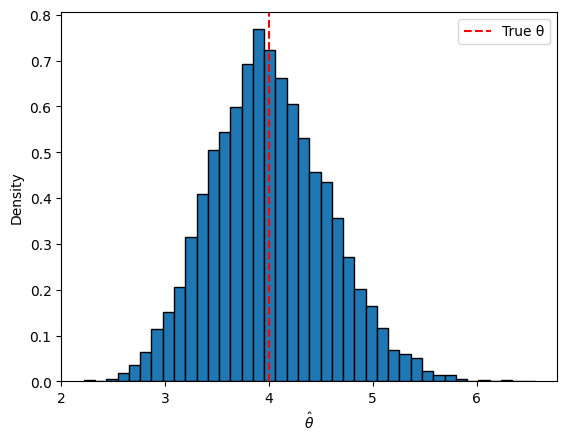

In [1]:
# --- Simulation for Question C:
import numpy as np
import matplotlib.pyplot as plt

theta_true = 4.0           # true theta
rate = 1.0 / theta_true    # parameter of Exp(rate)

N = 10_000   # number of repetitions
n = 50       # sample size in each repetition

# For Exp(1/theta), the MLE for theta is the sample mean
theta_hats = np.empty(N)

for i in range(N):
    # sample from Exp(1/theta_true)
    x = np.random.exponential(scale=theta_true, size=n)
    theta_hats[i] = x.mean()

# summary statistics
print(f"True theta: {theta_true}")
print(f"Mean of theta-hat: {theta_hats.mean():.3f}")
print(f"SD of theta-hat: {theta_hats.std(ddof=1):.3f}")

# histogram of the estimator
plt.hist(theta_hats, bins=40, density=True, edgecolor='black')
plt.axvline(theta_true, color='red', linestyle='--', label='True θ')
plt.xlabel(r'$\hat{\theta}$')
plt.ylabel('Density')
plt.legend()
plt.show()